In [1]:
!unzip Brain_tumor_dataset.zip -d Brain_tumor_dataset

Streaming output truncated to the last 5000 lines.
  inflating: Brain_tumor_dataset/Training/glioma/Tr-gl_0712.jpg  
  inflating: Brain_tumor_dataset/Training/glioma/Tr-gl_0713.jpg  
  inflating: Brain_tumor_dataset/Training/glioma/Tr-gl_0714.jpg  
  inflating: Brain_tumor_dataset/Training/glioma/Tr-gl_0715.jpg  
  inflating: Brain_tumor_dataset/Training/glioma/Tr-gl_0716.jpg  
  inflating: Brain_tumor_dataset/Training/glioma/Tr-gl_0717.jpg  
  inflating: Brain_tumor_dataset/Training/glioma/Tr-gl_0718.jpg  
  inflating: Brain_tumor_dataset/Training/glioma/Tr-gl_0719.jpg  
  inflating: Brain_tumor_dataset/Training/glioma/Tr-gl_0720.jpg  
  inflating: Brain_tumor_dataset/Training/glioma/Tr-gl_0721.jpg  
  inflating: Brain_tumor_dataset/Training/glioma/Tr-gl_0722.jpg  
  inflating: Brain_tumor_dataset/Training/glioma/Tr-gl_0723.jpg  
  inflating: Brain_tumor_dataset/Training/glioma/Tr-gl_0724.jpg  
  inflating: Brain_tumor_dataset/Training/glioma/Tr-gl_0725.jpg  
  inflating: Brain_tumor_

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import layers,models,regularizers
from tensorflow.keras.metrics import Precision, Recall

In [3]:
Image_size=(224,224)
batch_size=32
#Data preprocessing
image_size = (224, 224)
batch_size = 32
train_data="/content/Brain_tumor_dataset/Training"
test_data="/content/Brain_tumor_dataset/Testing"
val_split=0.2
seed=42
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=val_split,
    shear_range=0.1,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode='nearest',
    brightness_range=[0.9, 1.5]

)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=val_split
)

train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    seed=42,
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    train_data,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    seed=42,
    shuffle=False
)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)



Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [4]:
def vgg19():
    model = Sequential()

    # Block 1
    model.add(Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(224,224,3)))
    model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=2))

    # Block 2
    model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=2))

    # Block 3
    model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=2))

    # Block 4
    model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=2))

    # Block 5
    model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=2))

    # Fully Connected Layers
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(4, activation='softmax'))

    return model


In [5]:
model=vgg19()
model.summary()
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy','precision','recall'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         2,05

 Total params: 33,134,660 (126.40 MB)

 Trainable params: 33,134,660 (126.40 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
callbacks=[
    EarlyStopping(patience=3,restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=2, min_lr=1e-6),
    tf.keras.callbacks.ModelCheckpoint(filepath='best_model_vgg19_scratch.h5', monitor='val_acc', save_best_only=True)

]

In [7]:
history=model.fit(train_generator,validation_data=val_generator,epochs=30,callbacks=callbacks)

Epoch 1/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 894ms/step - accuracy: 0.3684 - loss: 1.2368 - precision: 0.7430 - recall: 0.1164

143/143 ━━━━━━━━━━━━━━━━━━━━ 208s 1s/step - accuracy: 0.3692 - loss: 1.2357 - precision: 0.7430 - recall: 0.1173 - val_accuracy: 0.5039 - val_loss: 1.7489 - val_precision: 0.5409 - val_recall: 0.4812 - learning_rate: 1.0000e-04
Epoch 2/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 633ms/step - accuracy: 0.6183 - loss: 0.8301 - precision: 0.7143 - recall: 0.4860

143/143 ━━━━━━━━━━━━━━━━━━━━ 105s 731ms/step - accuracy: 0.6186 - loss: 0.8296 - precision: 0.7144 - recall: 0.4864 - val_accuracy: 0.6494 - val_loss: 0.9072 - val_precision: 0.6811 - val_recall: 0.6047 - learning_rate: 1.0000e-04
Epoch 3/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 635ms/step - accuracy: 0.7240 - loss: 0.6678 - precision: 0.7748 - recall: 0.6404

143/143 ━━━━━━━━━━━━━━━━━━━━ 107s 743ms/step - accuracy: 0.7240 - loss: 0.6677 - precision: 0.7748 - recall: 0.6404 - val_accuracy: 0.7257 - val_loss: 0.7475 - val_precision: 0.7567 - val_recall: 0.6950 - learning_rate: 1.0000e-04
Epoch 4/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 633ms/step - accuracy: 0.7703 - loss: 0.5534 - precision: 0.7971 - recall: 0.7295

143/143 ━━━━━━━━━━━━━━━━━━━━ 103s 716ms/step - accuracy: 0.7703 - loss: 0.5534 - precision: 0.7970 - recall: 0.7294 - val_accuracy: 0.5837 - val_loss: 1.2278 - val_precision: 0.6021 - val_recall: 0.5662 - learning_rate: 1.0000e-04
Epoch 5/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 633ms/step - accuracy: 0.7651 - loss: 0.5763 - precision: 0.8038 - recall: 0.7205

143/143 ━━━━━━━━━━━━━━━━━━━━ 109s 756ms/step - accuracy: 0.7652 - loss: 0.5761 - precision: 0.8039 - recall: 0.7206 - val_accuracy: 0.7309 - val_loss: 0.9645 - val_precision: 0.7404 - val_recall: 0.7125 - learning_rate: 1.0000e-04
Epoch 6/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 635ms/step - accuracy: 0.8100 - loss: 0.4522 - precision: 0.8244 - recall: 0.7889

143/143 ━━━━━━━━━━━━━━━━━━━━ 106s 736ms/step - accuracy: 0.8099 - loss: 0.4525 - precision: 0.8244 - recall: 0.7888 - val_accuracy: 0.6941 - val_loss: 0.7901 - val_precision: 0.7265 - val_recall: 0.6635 - learning_rate: 1.0000e-04


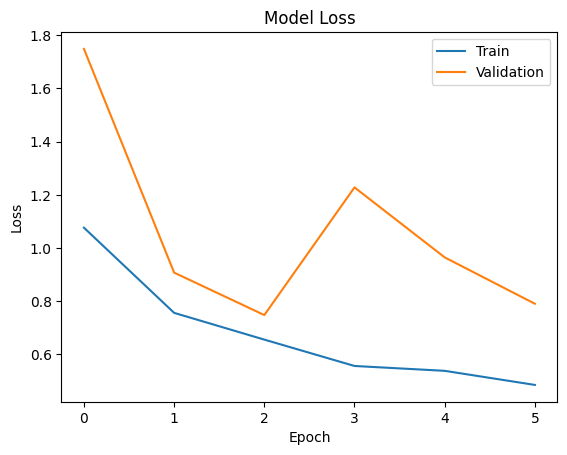

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

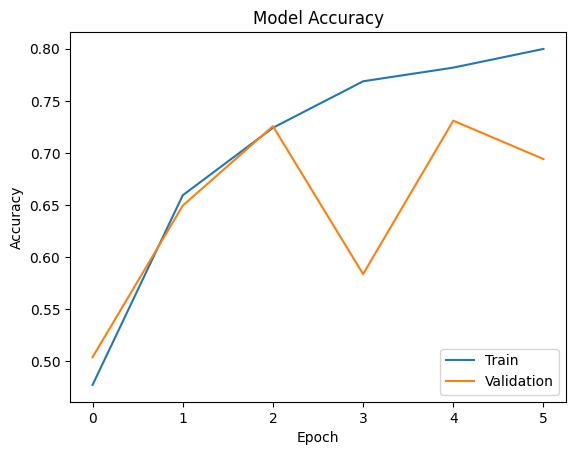

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [10]:
evaluation_res=model.evaluate(test_generator)
test_loss, test_accuracy, test_precision, test_recall = evaluation_res
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 21s 519ms/step - accuracy: 0.6381 - loss: 0.8434 - precision: 0.6541 - recall: 0.6096
Test Loss: 0.6228170394897461
Test Accuracy: 0.7452326416969299


In [11]:
pred_classes=model.predict(test_generator)

41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 238ms/step


In [12]:
from sklearn.metrics import classification_report, confusion_matrix

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Convert probabilities to predicted class labels
pred_classes_labels = np.argmax(pred_classes, axis=1)

print(classification_report(true_classes, pred_classes_labels, target_names=class_labels))


              precision    recall  f1-score   support

      glioma       0.76      0.62      0.68       300
  meningioma       0.54      0.44      0.49       306
     notumor       0.85      0.94      0.90       405
   pituitary       0.74      0.91      0.81       300

    accuracy                           0.75      1311
   macro avg       0.72      0.73      0.72      1311
weighted avg       0.73      0.75      0.73      1311



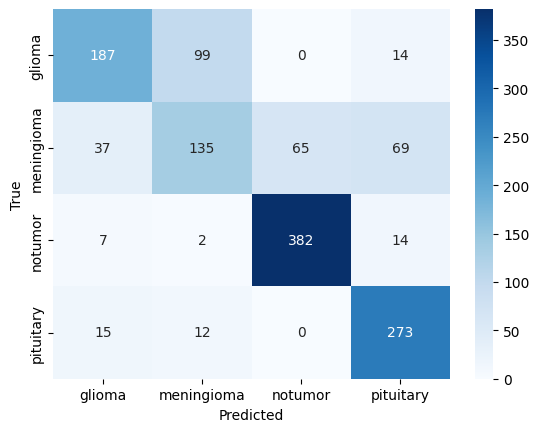

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(true_classes, pred_classes_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [14]:
import os

plot_dir = "vgg19_plots"
os.makedirs(plot_dir, exist_ok=True)


In [15]:
import matplotlib.pyplot as plt

# Example: Accuracy plot
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.savefig(f"{plot_dir}/accuracy.png", dpi=300, bbox_inches='tight')
plt.close()


In [17]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])
plt.savefig(f"{plot_dir}/loss.png", dpi=300, bbox_inches='tight')
plt.close()

In [18]:
import shutil

shutil.make_archive("vgg19_plots", 'zip', plot_dir)


'/content/vgg19_plots.zip'